In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,12

In [2]:
dataset = pd.read_csv(r'E:\Projects\Final_year Project\Tamilnadu2006.csv')
#Parse strings to datetime type
dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format=True)
indexedDataset = dataset.set_index(["Month"])

In [3]:
from datetime import datetime
indexedDataset.head(5)

,Total_Count
Month,
2006-01-01,4435
2006-02-01,4322
2006-03-01,4781
2006-04-01,4808
2006-05-01,5082


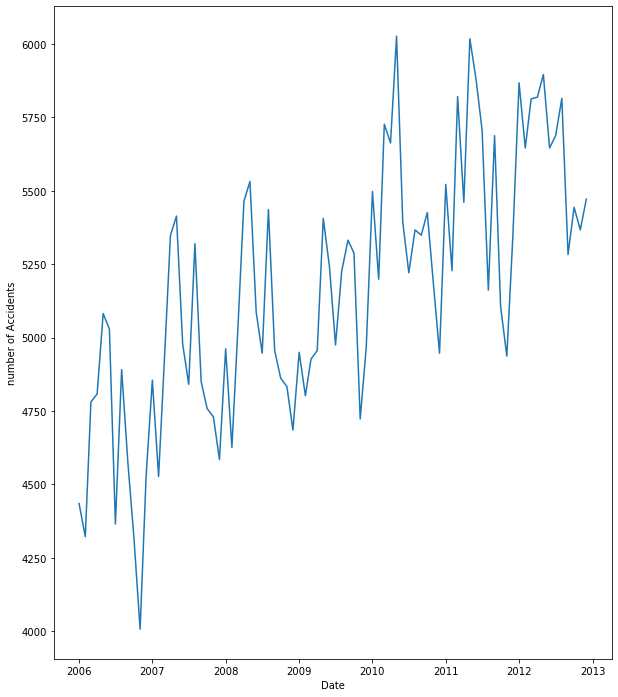

In [4]:
import matplotlib.pylab as plt
dataset = pd.read_csv(r'E:\Projects\Final_year Project\Tamilnadu2006.csv')
#Parse strings to datetime type
dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format=True)
plt.xlabel("Date")
plt.ylabel("number of Accidents")
plt.plot(dataset['Month'],dataset['Total_Count'])

In [5]:
#determining rolling statistics
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            Total_Count
Month                  
2006-01-01          NaN
2006-02-01          NaN
2006-03-01          NaN
2006-04-01          NaN
2006-05-01          NaN
...                 ...
2012-08-01  5605.583333
2012-09-01  5571.833333
2012-10-01  5599.916667
2012-11-01  5635.750000
2012-12-01  5646.416667

[84 rows x 1 columns]             Total_Count
Month                  
2006-01-01          NaN
2006-02-01          NaN
2006-03-01          NaN
2006-04-01          NaN
2006-05-01          NaN
...                 ...
2012-08-01   311.374507
2012-09-01   323.348063
2012-10-01   292.466147
2012-11-01   221.622991
2012-12-01   209.026948

[84 rows x 1 columns]


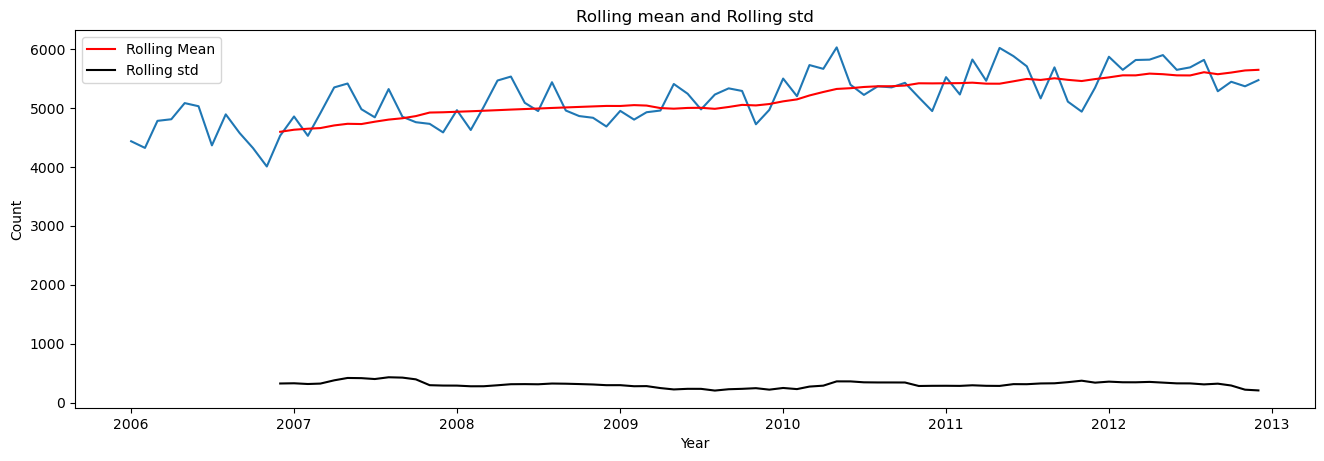

In [6]:
#def plot_df(dataset, x, y, title="", xlabel='Year', ylabel='total',dpi=100):
plt.figure(figsize=(16,5), dpi=100)
plt.plot(dataset.Month, dataset.Total_Count, color='tab:blue')
plt.gca().set(title='year wise total accidents in india', xlabel='Year', ylabel='Count')
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label="Rolling std")
plt.legend(loc='best')
plt.title('Rolling mean and Rolling std')
plt.show(block=False)
    

#plot_df(dataset, x=dataset.Month, y=dataset.Count, title='year wise total accidents in india') 

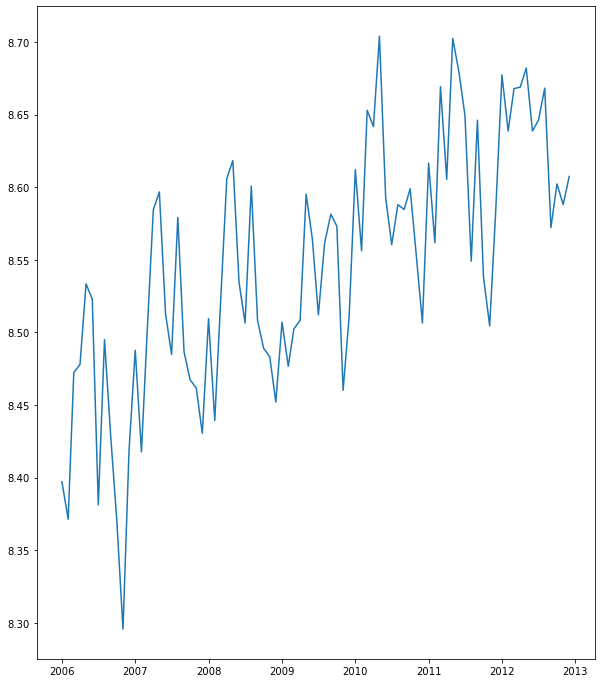

In [7]:
import pandas as pd
import numpy as np
dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format=True)
#indexedDataset = dataset.set_index(['Month'])
indexedDataset_logScale = np.log(dataset['Total_Count'])
plt.plot(dataset['Month'],indexedDataset_logScale)

In [22]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = read_csv(r'E:\Projects\Final_year Project\Tamilnadu2006.csv')

X = series.Total_Count
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.419017
p-value: 0.573126
Critical Values:
	1%: -3.525
	5%: -2.903
	10%: -2.589


In [23]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format=True)
#indexedDataset = dataset.set_index(['Month'])
indexedDataset_logScale = np.log(dataset['Total_Count'])
print('Results of Dickey-Fuller Test:')
dftest = adfuller(dataset['Total_Count'],autolag='AIC')

dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -1.419017
p-value                         0.573126
#Lags Used                     11.000000
Number of Observations used    72.000000
Critical value (1%)            -3.524624
Critical value (5%)            -2.902607
Critical value (10%)           -2.588679
dtype: float64


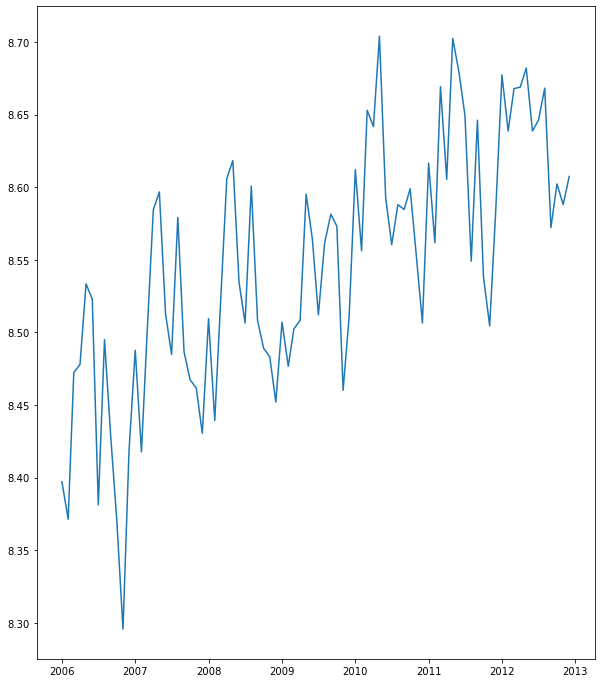

In [24]:
#estimating trend
indexedDataset_logScale = np.log(dataset['Total_Count'])
plt.plot(dataset['Month'],indexedDataset_logScale)

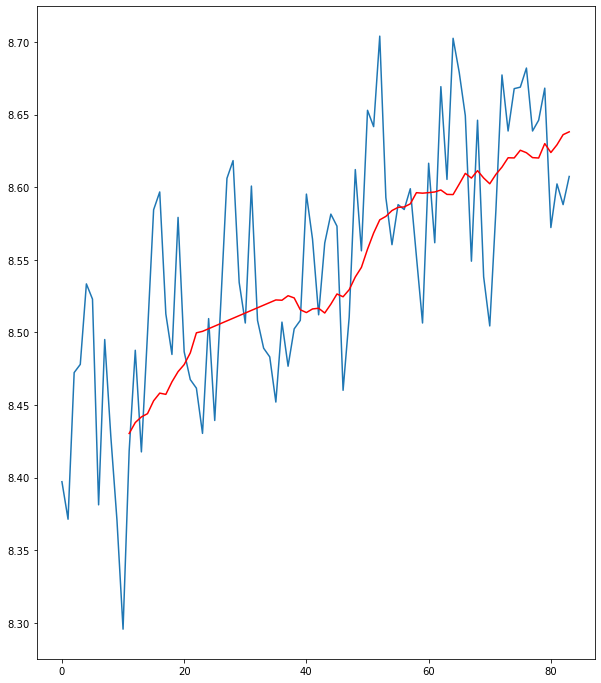

In [25]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')

In [26]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#removing Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

11   -0.012007
12    0.049740
13   -0.024071
14    0.055111
15    0.131486
16    0.138478
17    0.055368
18    0.018835
19    0.106181
20    0.008822
Name: Total_Count, dtype: float64

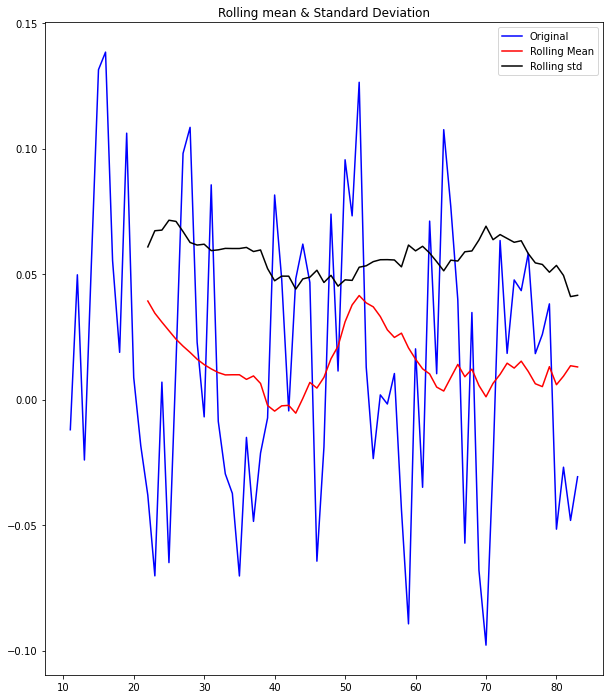

Results of Dickey-Fuller Test:
Test Statistic                 -2.330099
p-value                         0.162444
#Lags Used                     11.000000
Number of Observations used    61.000000
Critical value (1%)            -3.542413
Critical value (5%)            -2.910236
Critical value (10%)           -2.592745
dtype: float64


In [27]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #determining rolling statistics:
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plot rolling statistics
    orig = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(movingAverage,color='red',label='Rolling Mean')
    std  = plt.plot(movingSTD,color='black',label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean & Standard Deviation')
    plt.show(block=False)
    
    #performing Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,autolag='AIC')

    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput)
test_stationarity(datasetLogScaleMinusMovingAverage)
    
    

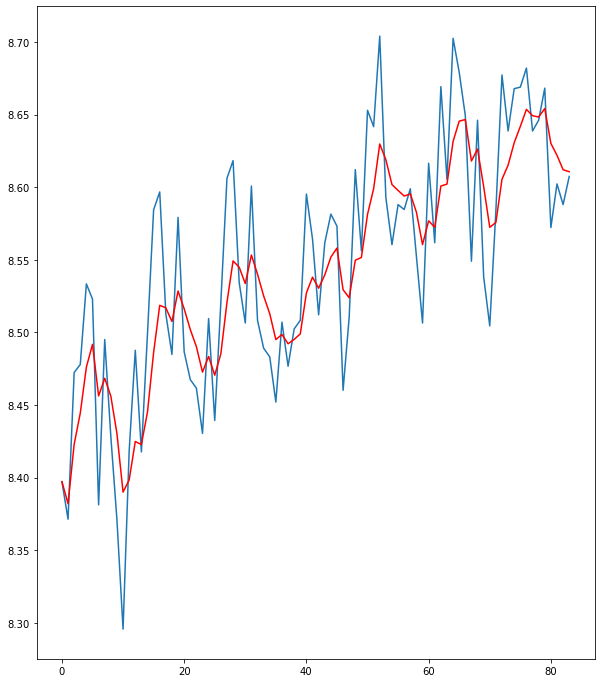

In [30]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=2,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

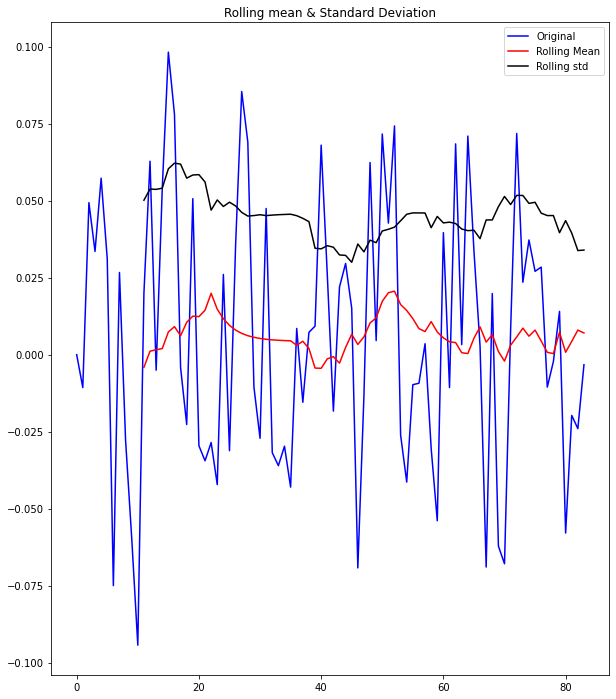

Results of Dickey-Fuller Test:
Test Statistic                 -3.248529
p-value                         0.017342
#Lags Used                     11.000000
Number of Observations used    72.000000
Critical value (1%)            -3.524624
Critical value (5%)            -2.902607
Critical value (10%)           -2.588679
dtype: float64


In [31]:
datasetLofScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLofScaleMinusMovingExponentialDecayAverage)

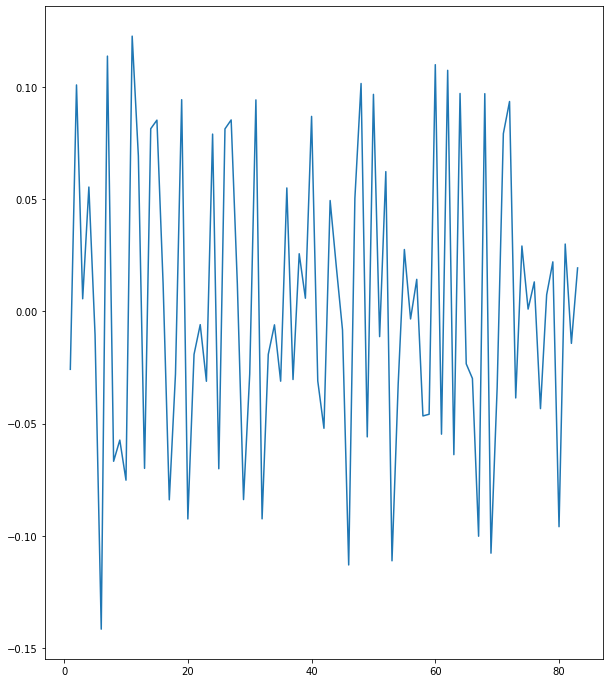

In [32]:
datasetlogDiffShifting =indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetlogDiffShifting)

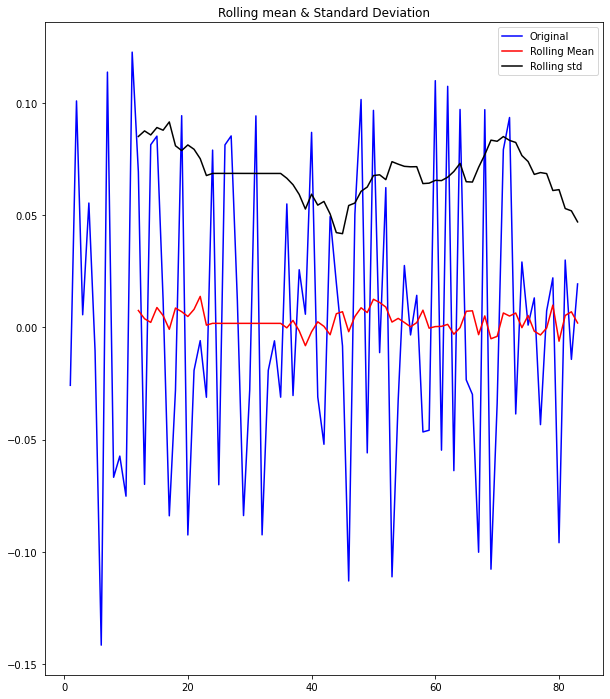

Results of Dickey-Fuller Test:
Test Statistic                -7.062026e+00
p-value                        5.193994e-10
#Lags Used                     1.000000e+01
Number of Observations used    7.200000e+01
Critical value (1%)           -3.524624e+00
Critical value (5%)           -2.902607e+00
Critical value (10%)          -2.588679e+00
dtype: float64


In [33]:
datasetlogDiffShifting.dropna(inplace=True)
test_stationarity(datasetlogDiffShifting)

C:\Users\stalin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\stalin\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  wa

Plotting AR model


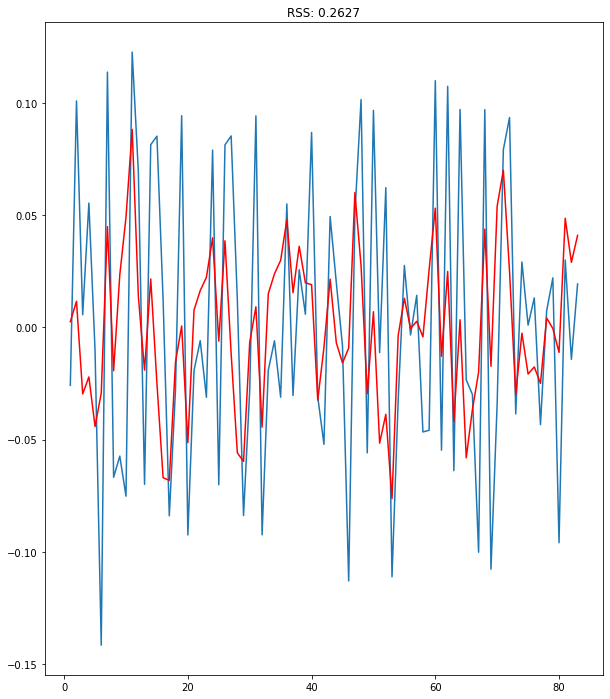

In [34]:
from statsmodels.tsa.arima_model import ARIMA
#AR model
model = ARIMA(indexedDataset_logScale,order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetlogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetlogDiffShifting)**2))
print('Plotting AR model')

Plotting AR model


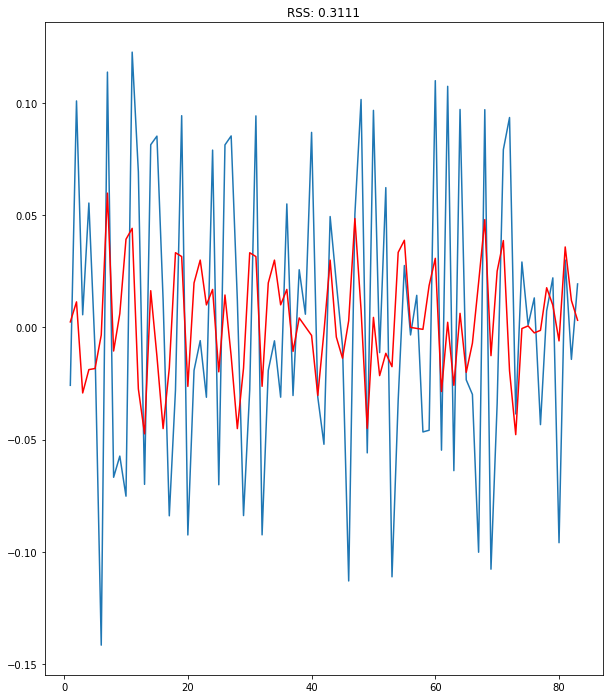

In [35]:
#MA
model = ARIMA(indexedDataset_logScale,order=(2,1,0))
results_MA = model.fit(disp=-1)
plt.plot(datasetlogDiffShifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetlogDiffShifting)**2))
print('Plotting AR model')

C:\Users\stalin\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\stalin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWar

Plotting AR model


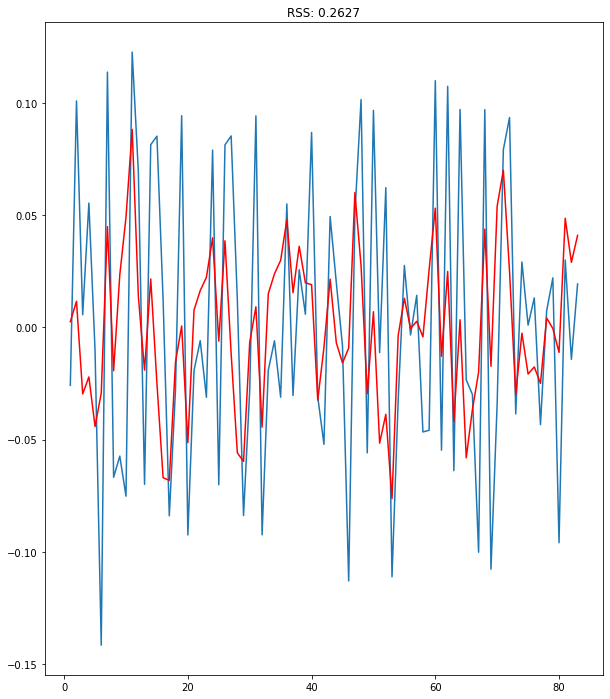

In [36]:
model = ARIMA(indexedDataset_logScale,order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetlogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetlogDiffShifting)**2))
print('Plotting AR model')

In [37]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

1    0.002562
2    0.011653
3   -0.029640
4   -0.022064
5   -0.044185
dtype: float64


In [38]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

1    0.002562
2    0.014215
3   -0.015426
4   -0.037489
5   -0.081674
dtype: float64


In [39]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale,index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

0    8.397283
1    8.374036
2    8.486620
3    8.462611
4    8.495971
dtype: float64

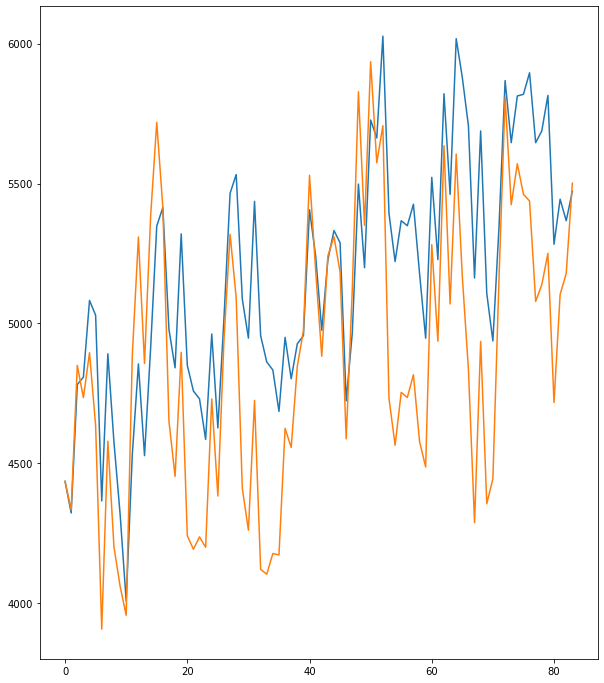

In [40]:
dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format=True)
indexedDataset = dataset.set_index(["Total_Count"])
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(dataset['Total_Count'])
plt.plot(predictions_ARIMA)

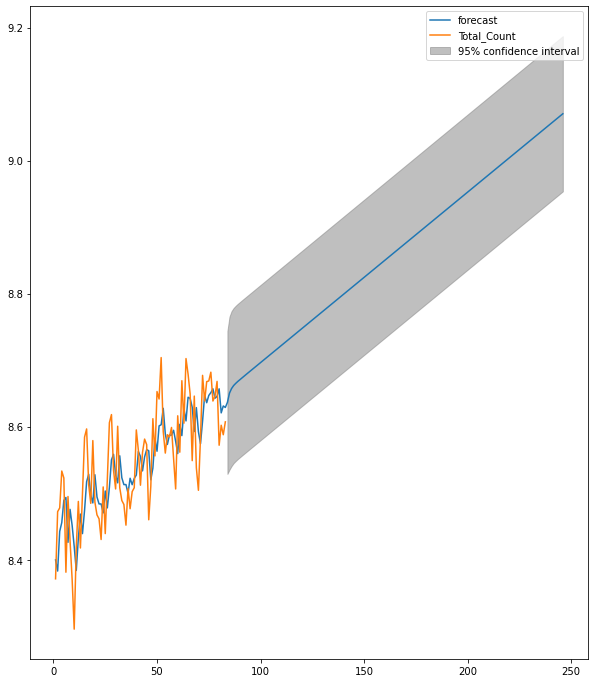

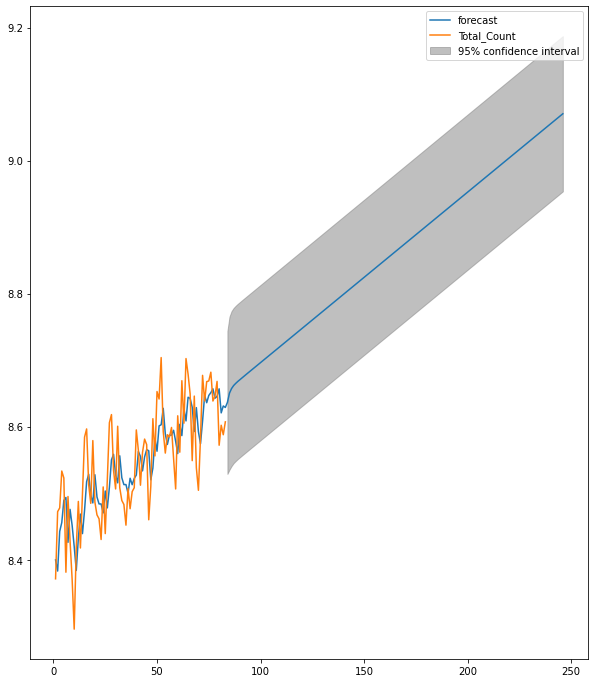

In [42]:
results_ARIMA.plot_predict(1,246)


In [45]:
result = results_ARIMA.forecast(steps=120)
np.exp(result[0])

array([5634.32408959, 5713.45078001, 5752.75652636, 5778.76369134,
       5797.45674994, 5814.34829586, 5829.81565541, 5845.16189079,
       5860.21386354, 5875.33284663, 5890.40144037, 5905.53411024,
       5920.67810132, 5935.87294227, 5951.09742724, 5966.36588356,
       5981.67016568, 5997.01562246, 6012.39921633, 6027.82300421,
       6043.28590146, 6058.78874185, 6074.33118043, 6089.91359395,
       6105.53591664, 6121.19835419, 6136.90094625, 6152.64383462,
       6168.4270989 , 6184.25085725, 6200.11520461, 6216.02025058,
       6231.96609621, 6247.95284821, 6263.98061026, 6280.04948834,
       6296.15958744, 6312.3110136 , 6328.50387267, 6344.73827103,
       6361.01431517, 6377.33211198, 6393.69176853, 6410.09339223,
       6426.53709071, 6443.02297192, 6459.55114407, 6476.12171565,
       6492.73479541, 6509.39049242, 6526.08891599, 6542.83017573,
       6559.61438152, 6576.44164354, 6593.31207223, 6610.22577833,
       6627.18287287, 6644.18346713, 6661.22767272, 6678.31560

In [54]:
predictions_ARIMA1 = np.exp(result[0])
sumarr = []
tot = 0
count = 0
for i in range(0,len(predictions_ARIMA1),1):
    count = count + 1
    if count != 13 :
        tot += predictions_ARIMA1[i]
    else :
        sumarr.append(tot)
        tot = 0
        count = 0
        continue
print(sumarr)
    
    

[69697.55994008284, 72244.09959607932, 74690.77783627142, 77220.31698511683, 79835.52357936984, 82539.29890524677, 85334.64250405622, 88224.65550203726, 91212.54405071396]


In [67]:

y_preditced = [69697.55994008284, 72244.09959607932]
y = [66238,67250]
year_2013 = abs((y[0]-y_preditced[0])/y[0]) * 100
print("Error percentage for year 2013 :","{:.2f}".format(year_2013))
year_2014 = abs((y[1]-y_preditced[1])/y[1]) * 100
print("Error percentage for year 2014 :","{:.2f}".format(year_2014))

Error percentage for year 2013 : 5.22
Error percentage for year 2014 : 7.43


In [58]:
predictions_ARIMA1 = np.exp(result[2])
sumarr = []
tot = 0
count = 0
for i in range(0,len(predictions_ARIMA1),1):
    count = count + 1
    if count != 13 :
        tot += predictions_ARIMA1[i]
    else :
        sumarr.append(tot)
        tot = 0
        count = 0
        continue
print(sumarr)

[array([62078.51253126, 78252.20149747]), array([64288.28111499, 81184.46839655]), array([66465.52104665, 83933.92853825]), array([68716.49690212, 86776.50381066]), array([71043.70615027, 89715.34806631]), array([73449.73057568, 92753.7216321 ]), array([75937.23939781, 95894.99524926]), array([78508.99223406, 99142.65381534]), array([ 81167.84216133, 102500.30025028])]
